Model, Multi-Head Attention ile oluşturuluyor...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 120, 10)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 120, 110)  │      3,410 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 60, 110)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 60, 110)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tcn (TCN)           │ (None, 60, 75)    │    247,050 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 75)    │          0 │ tcn[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_0 (LSTM)       │ (None, 60, 84)    │     53,760 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_lstm_0      │ (None, 60, 84)    │          0 │ lstm_0[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 84)    │     86,868 │ dropout_lstm_0[0… │
│ (MultiHeadAttentio… │                   │            │ dropout_lstm_0[0… │
│                     │                   │            │ dropout_lstm_0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 84)        │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 24)        │      2,040 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 393,128 (1.50 MB)

 Trainable params: 393,128 (1.50 MB)

 Non-trainable params: 0 (0.00 B)


Model, nihai değerlendirme için eğitiliyor...
Epoch 1/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - loss: 0.0209 - val_loss: 0.0114
Epoch 2/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - loss: 0.0116 - val_loss: 0.0104
Epoch 3/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 4/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 5/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 6/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 57s 27ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 7/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 8/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 9/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - loss: 0.0069 - val_loss: 0.0056
Epoch 10/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 11/50
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/

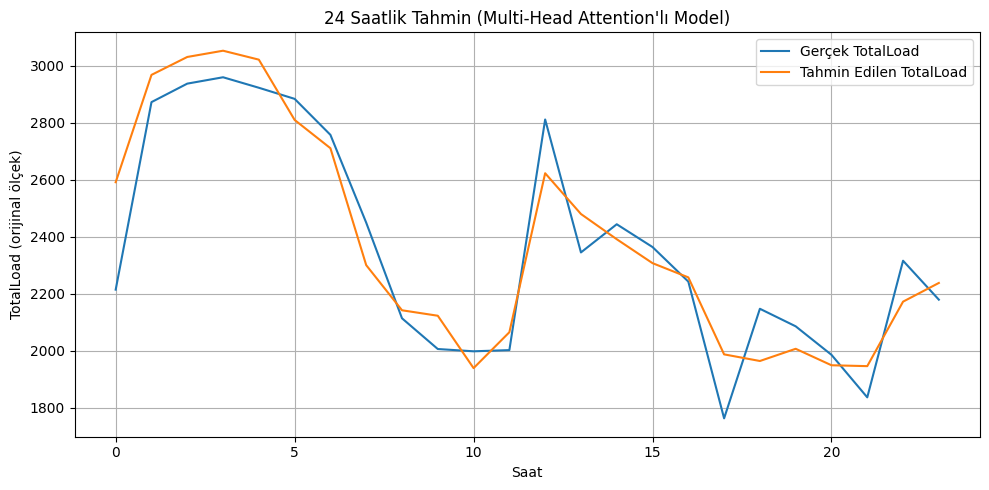

In [1]:
# ============================================================
# 🎯 Nihai Model Değerlendirme - Multi-Head Attention'lı Versiyon
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.model_selection import train_test_split

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout,
    MultiHeadAttention, GlobalAveragePooling1D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# TCN
from tcn import TCN

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === Sabitler ===
CSV_PATH = "clean-dataset.csv"
TARGET_COL = "TotalLoad"
INPUT_LEN = 120
OUTPUT_LEN = 24
#SELECTED_COLS = [
 #   'TotalLoad', 'SolarPower', 'FossilGas', 'OtherRenewable', 'ExchangeContinent', 'ExchangeNordicCountries',
  #  'ExchangeGreatBelt', 'FossilHardCoal', 'Biomass', 'OffshoreWindPower'
#]
SELECTED_COLS = [
    'TotalLoad', 'SolarPower', 'FossilGas', 'OtherRenewable', 'ExchangeContinent', 'ExchangeNordicCountries',
    'ExchangeGreatBelt', 'FossilHardCoal', 'Biomass', 'OffshoreWindPower'
]
# === Veri yükleme ===
try:
    df = pd.read_csv(CSV_PATH)
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"HATA: '{CSV_PATH}' bulunamadı.")
    exit()

if "HourUTC" in df.columns:
    df["HourUTC"] = pd.to_datetime(df["HourUTC"], errors="coerce")
    df = df.sort_values("HourUTC").reset_index(drop=True)

# Ölçekleme 
scalers = {}
cols_to_scale = list(set(SELECTED_COLS + [TARGET_COL])) 
for col in cols_to_scale:
    if col in df.columns:
        sc = MinMaxScaler()
        df[col] = sc.fit_transform(df[[col]])
        scalers[col] = sc


# === Kayar pencere ===
def create_sliding_windows(df: pd.DataFrame, features: list,
                           input_len=120, output_len=24, target_col="TotalLoad"):
    data = df[features].values
    target = df[target_col].values
    
    X, y = [], []
    for i in range(len(data) - input_len - output_len):
        X.append(data[i:i+input_len])
        y.append(target[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y), features

feature_names = [col for col in SELECTED_COLS if col in df.columns] 
X, y, features = create_sliding_windows(
    df, features=feature_names, input_len=INPUT_LEN,
    output_len=OUTPUT_LEN, target_col=TARGET_COL
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)


# === MAPE ===
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# === Optimum Parametreler (Multi-Head eklendi) ===
BEST_PARAMS = {
    'cnn_filters': 110,
    'cnn_kernel': 3,
    'cnn_dropout': 0.3675470566186519,
    'tcn_filters': 75,
    'tcn_kernel': 5,
    'tcn_dropout': 0.21991112627321538,
    'lstm_layers': 1,
    'lr': 0.000267740608371237,
    'batch_size': 16,
    'lstm_units_0': 84,
    'dropout_lstm_0': 0.1788371387484441,
    'num_heads': 8,
    'key_dim': 32
}
# === Model (CNN + TCN + LSTM + Multi-Head Attention) ===
print("Model, Multi-Head Attention ile oluşturuluyor...")
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN
x = Conv1D(
    BEST_PARAMS['cnn_filters'],
    kernel_size=BEST_PARAMS['cnn_kernel'],
    activation='relu',
    padding='same'
)(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(BEST_PARAMS['cnn_dropout'])(x)

# TCN
x = TCN(
    nb_filters=BEST_PARAMS['tcn_filters'],
    kernel_size=BEST_PARAMS['tcn_kernel'],
    dilations=[1, 2, 4, 8],
    activation='relu',
    return_sequences=True
)(x)
x = Dropout(BEST_PARAMS['tcn_dropout'])(x)

# LSTM blokları (sequence output)
for i in range(BEST_PARAMS['lstm_layers']):
    units = BEST_PARAMS[f'lstm_units_{i}']
    dropout_rate = BEST_PARAMS[f'dropout_lstm_{i}']
    
    x = LSTM(units, return_sequences=True, name=f'lstm_{i}')(x)
    x = Dropout(dropout_rate, name=f'dropout_lstm_{i}')(x)

# === Multi-Head Self-Attention ===
attn_output = MultiHeadAttention(
    num_heads=BEST_PARAMS['num_heads'],
    key_dim=BEST_PARAMS['key_dim'],
)(
    query=x,  # self-attention: query = key = value
    value=x,
    key=x
)

# Zaman boyutu üzerinden pooling (tek context vektörü)
x = GlobalAveragePooling1D()(attn_output)

# Çıkış
outputs = Dense(OUTPUT_LEN)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=BEST_PARAMS['lr']), loss='mse')

model.summary()

# === Eğitim ===
print("\nModel, nihai değerlendirme için eğitiliyor...")
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50, 
    batch_size=BEST_PARAMS['batch_size'],
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# === Tahmin ve ters ölçekleme ===
y_pred = model.predict(X_test, verbose=0)

tl_scaler = scalers[TARGET_COL]
y_test_inv = tl_scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
y_pred_inv = tl_scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)

# === Metrikler ===
mse_inv = mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())
rmse_inv = np.sqrt(mse_inv)
r2_inv = r2_score(y_test_inv.flatten(), y_pred_inv.flatten())
mae_inv = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
mape_inv = mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten())

print(f"\n--- Model Performansı (CNN + TCN + LSTM + Multi-Head Attention) ---")
print(f"Test MSE :  {mse_inv:,.2f}")
print(f"Test RMSE:  {rmse_inv:,.2f}")
print(f"Test MAE :  {mae_inv:,.2f}")
print(f"Test MAPE:  {mape_inv:,.2f}%")
print(f"Test R²  :  {r2_inv:.4f}")

# === Görselleştirme ===
plt.figure(figsize=(10,5))
plt.plot(y_test_inv[0], label='Gerçek TotalLoad')
plt.plot(y_pred_inv[0], label='Tahmin Edilen TotalLoad')
plt.title('24 Saatlik Tahmin (Multi-Head Attention\'lı Model)')
plt.xlabel('Saat')
plt.ylabel('TotalLoad (orijinal ölçek)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/umutguler/fiyat_env_tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



SHAP Analizi başlatılıyor... (Bu işlem biraz zaman alabilir)


100%|██████████| 10/10 [07:27<00:00, 44.72s/it]


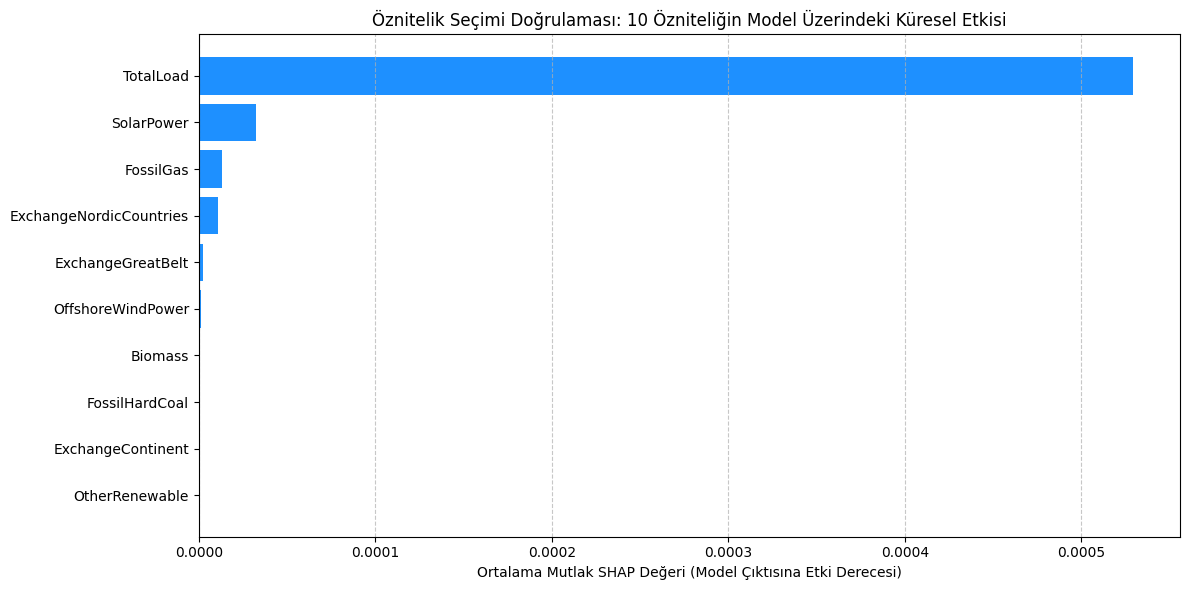

SHAP Summary Plot başarıyla oluşturuldu.


In [2]:
# ============================================================
# 🔍 SHAP XAI Analizi (KernelExplainer)
# ============================================================
import shap

print("\nSHAP Analizi başlatılıyor... (Bu işlem biraz zaman alabilir)")

# 1. SHAP için Wrapper (Sarmalayıcı) Fonksiyonu
# SHAP 2D veri gönderir, biz onu (örnek, 120, 10) formatına geri çeviriyoruz.
def shap_predict(x_flat):
    x_reshaped = x_flat.reshape((x_flat.shape[0], INPUT_LEN, len(feature_names)))
    preds = model.predict(x_reshaped, verbose=0)
    # Modelin çıktısı 24 saatliktir. SHAP genelde tek bir değer bekler. 
    # Global önem için 24 saatlik tahminin ortalamasını alıyoruz.
    return preds.mean(axis=1) 

# 2. Arka Plan (Background) Verisi Seçimi
# Hesaplamayı hızlandırmak için test setinden temsilci bir örneklem seçiyoruz.
X_test_flat = X_test.reshape(X_test.shape[0], -1)
background = shap.sample(X_test_flat, 20) # 20 örnek ideal hız sağlar

# 3. Explainer Oluşturma
explainer = shap.KernelExplainer(shap_predict, background)

# 4. SHAP Değerlerini Hesaplama
# İlk 10 test örneği üzerinde özniteliklerin etkisini hesaplayalım
num_test_samples = 10 
shap_values = explainer.shap_values(X_test_flat[:num_test_samples])

# 5. Görselleştirme: Global Feature Importance (Öznitelik Seçimi Doğrulaması)
# Zaman serisi verisinde her özelliğin her zaman adımındaki etkisini topluca görmek için:
# 120 zaman adımı x 10 özellik = 1200 kolon oluşur. 
# Biz bunu sadece 10 ana özellik bazında özetleyelim.

shap_values_reshaped = np.array(shap_values).reshape(num_test_samples, INPUT_LEN, len(feature_names))
# Zaman boyutu (axis=1) üzerinden mutlak değer ortalaması alarak 10 özniteliğe indirgeyelim
global_shap_importance = np.abs(shap_values_reshaped).mean(axis=(0, 1))

# Grafikleştirme
plt.figure(figsize=(12, 6))
indices = np.argsort(global_shap_importance)
plt.barh(range(len(indices)), global_shap_importance[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Ortalama Mutlak SHAP Değeri (Model Çıktısına Etki Derecesi)')
plt.title('Öznitelik Seçimi Doğrulaması: 10 Özniteliğin Model Üzerindeki Küresel Etkisi')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("SHAP Summary Plot başarıyla oluşturuldu.")


[SHAP] KernelExplainer oluşturuluyor...
[SHAP] SHAP değerleri hesaplanıyor (bu kısım yavaş olabilir)...


 95%|█████████▌| 38/40 [04:59<00:15,  7.97s/it]/Users/umutguler/fiyat_env_tf/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(
100%|██████████| 40/40 [05:15<00:00,  7.88s/it]


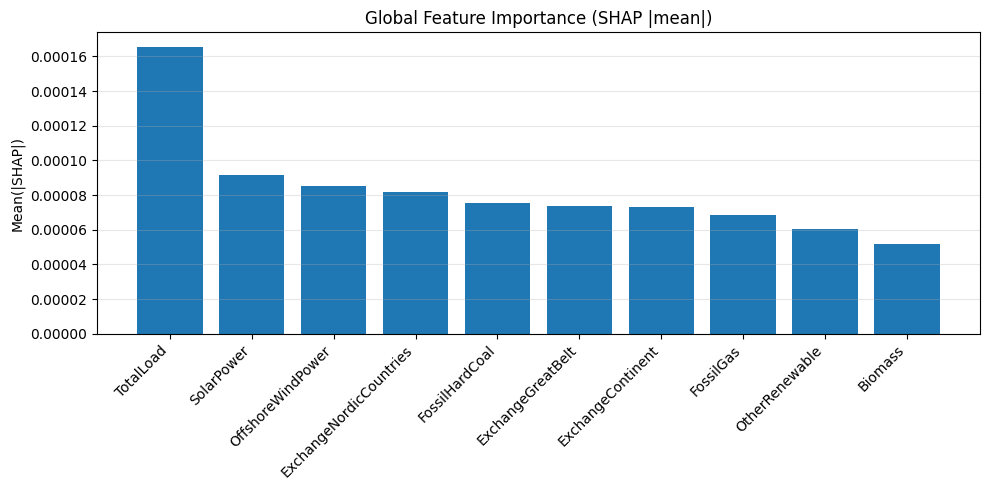

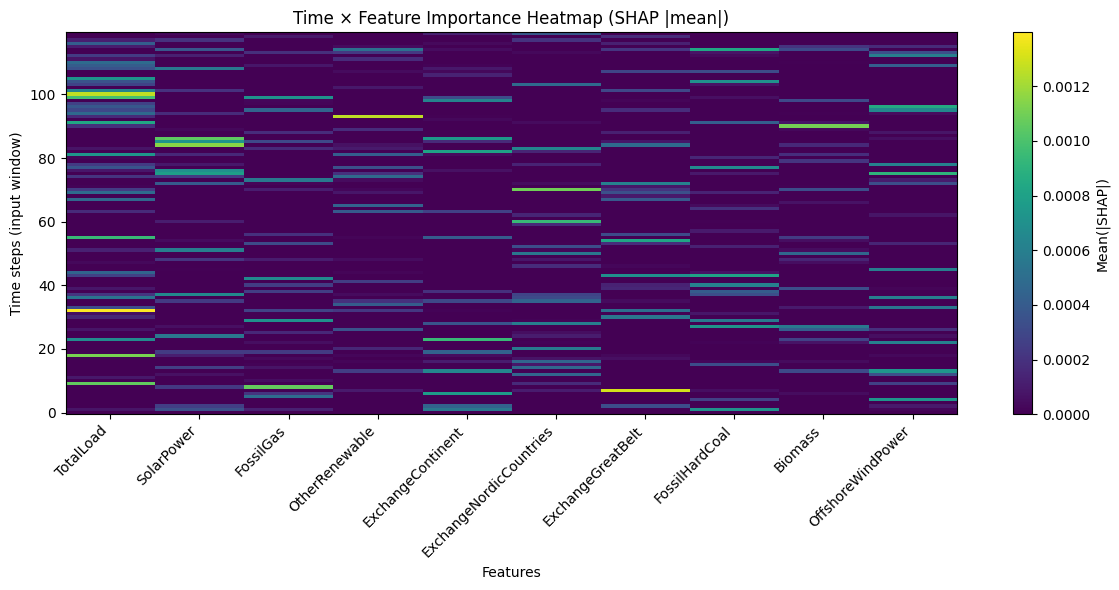


[SHAP] En hatalı örnek index (test seti içinde): 2324
[SHAP] |hata| (ölçekli uzay): 0.033666


100%|██████████| 1/1 [00:07<00:00,  7.83s/it]


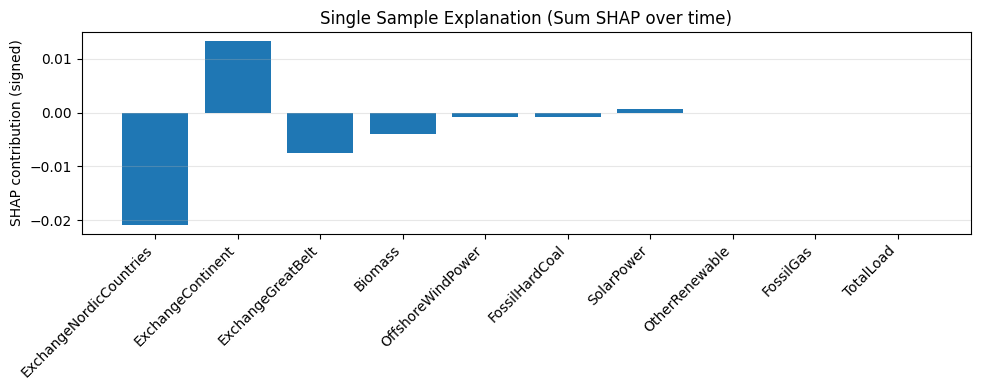


✅ SHAP analizi tamamlandı.
Not: Bu çıktı, modelin (24 saat ortalama) tahminine göre açıklamadır.
İstersen TARGET_MODE='hour' yaparak belirli bir saati (ör. 24. saat) açıklayabilirsin.


In [3]:
# ============================================================
# ✅ XAI (SHAP) - KernelExplainer ile Açıklanabilirlik Analizi
#    (Zaman Serisi için flatten -> shap -> reshape yaklaşımı)
# ============================================================

# Eğer kurulu değilse: pip install shap
import shap
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) SHAP ayarları
# -----------------------------
TARGET_MODE = "mean"   # "mean" veya "hour"
TARGET_HOUR_INDEX = 0  # TARGET_MODE="hour" ise 0..23 arası (0 = 1. saat)

BACKGROUND_SIZE = 80   # 50-200 arası makul
EXPLAIN_SIZE = 40      # 20-100 arası makul
NSAMPLES = 200         # 100-500; artarsa daha iyi ama yavaş

# SHAP grafikleri için feature adları:
feature_names = features  # senin create_sliding_windows'dan gelen features listesi

T = X_train.shape[1]
F = X_train.shape[2]

def flatten_ts(X):
    return X.reshape(X.shape[0], T * F)

def unflatten_ts(X_flat):
    return X_flat.reshape(X_flat.shape[0], T, F)

# Eğitim setinden background örnek seçimi (rastgele)
rng = np.random.default_rng(SEED)
bg_idx = rng.choice(X_train.shape[0], size=min(BACKGROUND_SIZE, X_train.shape[0]), replace=False)
X_bg_flat = flatten_ts(X_train[bg_idx])

# Test setinden açıklanacak örnekler (rastgele)
ex_idx = rng.choice(X_test.shape[0], size=min(EXPLAIN_SIZE, X_test.shape[0]), replace=False)
X_explain = X_test[ex_idx]
X_explain_flat = flatten_ts(X_explain)

# -----------------------------
# 2) Model wrapper (çoklu output -> tek hedef)
# -----------------------------
def predict_fn(X_flat):
    """
    X_flat: (N, T*F)
    return: (N,)  -> KernelExplainer için tek boyutlu çıktı
    """
    X = unflatten_ts(X_flat)
    y_hat = model.predict(X, verbose=0)  # (N, OUTPUT_LEN)

    if TARGET_MODE == "mean":
        return np.mean(y_hat, axis=1)  # (N,)
    elif TARGET_MODE == "hour":
        return y_hat[:, TARGET_HOUR_INDEX]  # (N,)
    else:
        raise ValueError("TARGET_MODE 'mean' veya 'hour' olmalı.")

# -----------------------------
# 3) KernelExplainer + SHAP değerleri
# -----------------------------
print("\n[SHAP] KernelExplainer oluşturuluyor...")
explainer = shap.KernelExplainer(predict_fn, X_bg_flat)

print("[SHAP] SHAP değerleri hesaplanıyor (bu kısım yavaş olabilir)...")
shap_values = explainer.shap_values(X_explain_flat, nsamples=NSAMPLES)

# shap_values: (N_explain, T*F)
shap_values = np.array(shap_values)

# 3B forma dönüştür: (N, T, F)
sv_3d = shap_values.reshape(shap_values.shape[0], T, F)

# -----------------------------
# 4) Tezlik Çıktı-1: Global Feature Importance
#    (time ve örnek ortalaması ile |SHAP| -> (F,)
# -----------------------------
global_importance = np.mean(np.abs(sv_3d), axis=(0, 1))  # (F,)

plt.figure(figsize=(10, 5))
sorted_idx = np.argsort(global_importance)[::-1]
plt.bar([feature_names[i] for i in sorted_idx], global_importance[sorted_idx])
plt.title("Global Feature Importance (SHAP |mean|)")
plt.ylabel("Mean(|SHAP|)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Tezlik Çıktı-2: Time × Feature Heatmap
#    (örnek ortalaması ile |SHAP| -> (T,F)
# -----------------------------
time_feature_importance = np.mean(np.abs(sv_3d), axis=0)  # (T, F)

plt.figure(figsize=(12, 6))
plt.imshow(time_feature_importance, aspect="auto", origin="lower")
plt.colorbar(label="Mean(|SHAP|)")
plt.title("Time × Feature Importance Heatmap (SHAP |mean|)")
plt.xlabel("Features")
plt.ylabel("Time steps (input window)")
plt.xticks(ticks=np.arange(F), labels=feature_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

# -----------------------------
# 6) Tezlik Çıktı-3: Örnek bazlı açıklama
#    (en yüksek hatalı örneği seçip SHAP ile yorumlatma)
# -----------------------------
# Hata hesaplamak için hedefi aynı şekilde indirgemeliyiz:
y_test_hat = model.predict(X_test, verbose=0)  # (N_test, 24)

if TARGET_MODE == "mean":
    y_true_scalar = np.mean(y_test, axis=1)     # ölçekli (0-1) uzayında
    y_pred_scalar = np.mean(y_test_hat, axis=1) # ölçekli
else:
    y_true_scalar = y_test[:, TARGET_HOUR_INDEX]
    y_pred_scalar = y_test_hat[:, TARGET_HOUR_INDEX]

abs_err = np.abs(y_true_scalar - y_pred_scalar)
worst_i = int(np.argmax(abs_err))

print(f"\n[SHAP] En hatalı örnek index (test seti içinde): {worst_i}")
print(f"[SHAP] |hata| (ölçekli uzay): {abs_err[worst_i]:.6f}")

# En hatalı örneği explain listemizde yoksa, ayrıca SHAP hesaplayalım
X_one = X_test[worst_i:worst_i+1]
X_one_flat = flatten_ts(X_one)
sv_one = explainer.shap_values(X_one_flat, nsamples=NSAMPLES)  # (1, T*F)
sv_one = np.array(sv_one).reshape(T, F)

# Bu örnek için feature bazında (time üzerinden) toplulaştır
sv_one_feat = np.sum(sv_one, axis=0)  # (F,)

plt.figure(figsize=(10, 4))
order = np.argsort(np.abs(sv_one_feat))[::-1]
plt.bar([feature_names[i] for i in order], sv_one_feat[order])
plt.title("Single Sample Explanation (Sum SHAP over time)")
plt.ylabel("SHAP contribution (signed)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ SHAP analizi tamamlandı.")
print("Not: Bu çıktı, modelin (24 saat ortalama) tahminine göre açıklamadır.")
print("İstersen TARGET_MODE='hour' yaparak belirli bir saati (ör. 24. saat) açıklayabilirsin.")